# Image Classification - Men and Women


## Importing Packages

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

## Loading Data

In [ ]:
!rm -rf data && mkdir data && wget http://info.iut-bm.univ-fcomte.fr/staff/couturie/images.zip  && unzip images.zip -d data/
!ls data

In [ ]:
TRAIN_DIR = 'data/train'
VALIDATION_DIR = 'data/validation'

In [ ]:
train_men_dir = 'data/train/men'  # directory with our training men pictures
train_women_dir = 'data/train/women'  # directory with our training women pictures
validation_men_dir = 'data/validation/men'  # directory with our validation men pictures
validation_women_dir = 'data/validation/women'  # directory with our validation women pictures

In [ ]:
num_men_tr = len(os.listdir(train_men_dir))
num_women_tr = len(os.listdir(train_women_dir))

num_men_val = len(os.listdir(validation_men_dir))
num_women_val = len(os.listdir(validation_women_dir))

total_train = num_men_tr + num_women_tr
total_val = num_men_val + num_women_val

## Data Summary

In [ ]:
print('Total training men images:', num_men_tr)
print('Total training women images:', num_women_tr)

print('Total validation men images:', num_men_val)
print('Total validation women images:', num_women_val)
print("---------------------")
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training men images: 104
Total training women images: 102
Total validation men images: 103
Total validation women images: 103
---------------------
Total training images: 206
Total validation images: 206


## Setting Model Parameters

In [ ]:
BATCH_SIZE = 32
IMG_SHAPE  = 150 

## Data Flow & Data Augmentation

In [ ]:
data_augmentation = True

if not data_augmentation:
  print('Not using data augmentation.')
  train_datagen = ImageDataGenerator(rescale=1./255)
else:
  print('Using real-time data augmentation.')
  # train_datagen = ImageDataGenerator(
  #       rescale=1./255,
  #       rotation_range=40,
  #       width_shift_range=0.2,
  #       height_shift_range=0.2,
  #       shear_range=0.2,
  #       zoom_range=0.2,
  #       horizontal_flip=True,
  #       fill_mode='nearest')
  train_datagen = ImageDataGenerator(
          featurewise_center=False,  # set input mean to 0 over the dataset
          samplewise_center=False,  # set each sample mean to 0
          featurewise_std_normalization=False,  # divide inputs by std of the dataset
          samplewise_std_normalization=False,  # divide each input by its std
          zca_whitening=False,  # apply ZCA whitening
          zca_epsilon=1e-06,  # epsilon for ZCA whitening
          rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
          # randomly shift images horizontally (fraction of total width)
          width_shift_range=0.1,
          # randomly shift images vertically (fraction of total height)
          height_shift_range=0.1,
          shear_range=0.,  # set range for random shear
          zoom_range=0.,  # set range for random zoom
          channel_shift_range=0.,  # set range for random channel shifts
          # set mode for filling points outside the input boundaries
          fill_mode='nearest',
          cval=0.,  # value used for fill_mode = "constant"
          horizontal_flip=True,  # randomly flip images
          vertical_flip=False,  # randomly flip images
          # set rescaling factor (applied before any other transformation)
          rescale=1./255,
          # set function that will be applied on each input
          preprocessing_function=None,
          # image data format, either "channels_first" or "channels_last"
          data_format=None,
          # fraction of images reserved for validation (strictly between 0 and 1)
          validation_split=0.0)


# train_generator = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
#                                                     directory=TRAIN_DIR,
#                                                     shuffle=True,
#                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
#                                                     class_mode='binary')

train_generator = train_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                    directory=TRAIN_DIR,
                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
                                                    class_mode='binary')

Not using data augmentation.
Found 206 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(batch_size=BATCH_SIZE,
                                                  directory=VALIDATION_DIR,
                                                  target_size=(IMG_SHAPE, IMG_SHAPE),
                                                  class_mode='binary')

Found 206 images belonging to 2 classes.


## Simple Convolutional Neural Network

In [ ]:
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.models import Model
from keras.layers import Input

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Result With No Data Augmentation (Shows Overfitting)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

Epoch 1/30
7/7 [==============================] - 1s 115ms/step - loss: 0.3153 - accuracy: 0.8641 - val_loss: 0.5278 - val_accuracy: 0.7670
Epoch 2/30
7/7 [==============================] - 1s 104ms/step - loss: 0.2682 - accuracy: 0.8786 - val_loss: 0.6419 - val_accuracy: 0.7670
Epoch 3/30
7/7 [==============================] - 1s 98ms/step - loss: 0.3224 - accuracy: 0.8592 - val_loss: 0.4922 - val_accuracy: 0.8058
Epoch 4/30
7/7 [==============================] - 1s 96ms/step - loss: 0.2642 - accuracy: 0.8835 - val_loss: 0.5482 - val_accuracy: 0.7718
Epoch 5/30
7/7 [==============================] - 1s 97ms/step - loss: 0.2482 - accuracy: 0.9175 - val_loss: 0.5193 - val_accuracy: 0.7816
Epoch 6/30
7/7 [==============================] - 1s 99ms/step - loss: 0.2216 - accuracy: 0.9126 - val_loss: 0.6195 - val_accuracy: 0.7816
Epoch 7/30
7/7 [==============================] - 1s 102ms/step - loss: 0.1451 - accuracy: 0.9272 - val_loss: 0.6091 - val_accuracy: 0.8010
Epoch 8/30
7/7 [========

In [ ]:
score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 - 0s - loss: 1.2062 - accuracy: 0.7864
Test loss: 1.206180214881897
Test accuracy: 0.7864077687263489


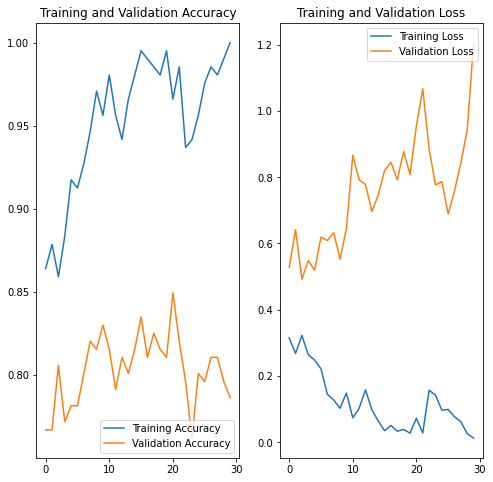

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Result With Data Augmentation


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)
epochs=30
history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

Epoch 1/30
7/7 [==============================] - 2s 241ms/step - loss: 0.7341 - accuracy: 0.5825 - val_loss: 0.6959 - val_accuracy: 0.5000
Epoch 2/30
7/7 [==============================] - 1s 174ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/30
7/7 [==============================] - 1s 155ms/step - loss: 0.6818 - accuracy: 0.5388 - val_loss: 0.6794 - val_accuracy: 0.5583
Epoch 4/30
7/7 [==============================] - 1s 149ms/step - loss: 0.6695 - accuracy: 0.5922 - val_loss: 0.6435 - val_accuracy: 0.6262
Epoch 5/30
7/7 [==============================] - 1s 172ms/step - loss: 0.6228 - accuracy: 0.6408 - val_loss: 0.6462 - val_accuracy: 0.5825
Epoch 6/30
7/7 [==============================] - 1s 173ms/step - loss: 0.6316 - accuracy: 0.6893 - val_loss: 0.6130 - val_accuracy: 0.6408
Epoch 7/30
7/7 [==============================] - 1s 170ms/step - loss: 0.5782 - accuracy: 0.6602 - val_loss: 0.5681 - val_accuracy: 0.7524
Epoch 8/30
7/7 [====

In [ ]:
score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

7/7 - 0s - loss: 0.4496 - accuracy: 0.7913
Test loss: 0.4496449828147888
Test accuracy: 0.791262149810791


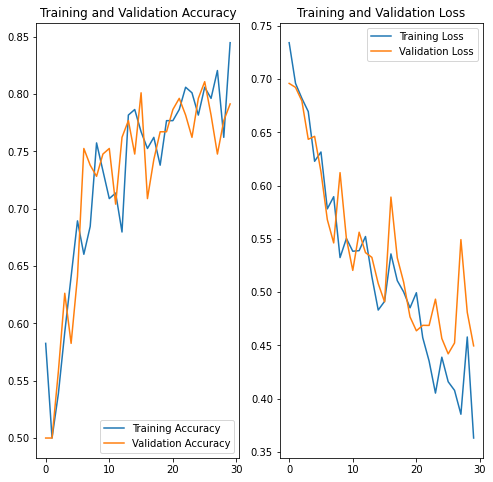

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Densenet121

### Train All Layers

In [ ]:
from tensorflow.keras.applications import DenseNet121

net= DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:]:
    layer.trainable = True

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')

# train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=20
history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
7/7 [==============================] - 4s 518ms/step - loss: 0.9492 - accuracy: 0.5777 - val_loss: 0.3966 - val_accuracy: 0.8592
Epoch 2/20
7/7 [==============================] - 2s 217ms/step - loss: 0.5332 - accuracy: 0.7670 - val_loss: 0.3489 - val_accuracy: 0.8738
Epoch 3/20
7/7 [==============================] - 2s 215ms/step - loss: 0.4545 - accuracy: 0.7961 - val_loss: 0.3796 - val_accuracy: 0.8738
Epoch 4/20
7/7 [==============================] - 2s 236ms/step - loss: 0.4697 - accuracy: 0.8010 - val_loss: 0.3077 - val_accuracy: 0.8835
Epoch 5/20
7/7 [==============================] - 2s 218ms/step - loss: 0.3532 - accuracy: 0.8738 - val_loss: 0.2697 - val_accuracy: 0.9078
Epoch 6/20
7/7 [==============================] - 2s 224ms/step - loss: 0.2082 - accuracy: 0.9126 - val_loss: 0.3932 - val_accuracy: 0.8738
Epoch 7/20
7/7 [==============================] - 2s 223ms/step - loss: 0.2602 - accuracy: 0.8932 - val_loss: 0.1660 - val_accuracy: 0.9417
Epoch 8/20
7/7 [====

### Freeze All Layers


In [ ]:
from tensorflow.keras.applications import DenseNet121

net= DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
7/7 [==============================] - 3s 468ms/step - loss: 0.9295 - accuracy: 0.5534 - val_loss: 0.6656 - val_accuracy: 0.6262
Epoch 2/20
7/7 [==============================] - 1s 149ms/step - loss: 0.9276 - accuracy: 0.5825 - val_loss: 0.5443 - val_accuracy: 0.7816
Epoch 3/20
7/7 [==============================] - 1s 168ms/step - loss: 0.6603 - accuracy: 0.6845 - val_loss: 0.4680 - val_accuracy: 0.8301
Epoch 4/20
7/7 [==============================] - 1s 166ms/step - loss: 0.7034 - accuracy: 0.6845 - val_loss: 0.4079 - val_accuracy: 0.8495
Epoch 5/20
7/7 [==============================] - 1s 168ms/step - loss: 0.6430 - accuracy: 0.6893 - val_loss: 0.3625 - val_accuracy: 0.8738
Epoch 6/20
7/7 [==============================] - 1s 161ms/step - loss: 0.5784 - accuracy: 0.7087 - val_loss: 0.3246 - val_accuracy: 0.8883
Epoch 7/20
7/7 [==============================] - 2s 220ms/step - loss: 0.5748 - accuracy: 0.7184 - val_loss: 0.3049 - val_accuracy: 0.8981
Epoch 8/20
7/7 [====

### Freeze All Layers Except Last X Layers


In [ ]:
from tensorflow.keras.applications import DenseNet121

net= DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 3s 482ms/step - loss: 1.1218 - accuracy: 0.5194 - val_loss: 0.6067 - val_accuracy: 0.6699
Epoch 2/10
7/7 [==============================] - 2s 217ms/step - loss: 0.7720 - accuracy: 0.6068 - val_loss: 0.5592 - val_accuracy: 0.7136
Epoch 3/10
7/7 [==============================] - 1s 186ms/step - loss: 0.8596 - accuracy: 0.5971 - val_loss: 0.4752 - val_accuracy: 0.7621
Epoch 4/10
7/7 [==============================] - 1s 167ms/step - loss: 0.7978 - accuracy: 0.6748 - val_loss: 0.4419 - val_accuracy: 0.7767
Epoch 5/10
7/7 [==============================] - 1s 210ms/step - loss: 0.7527 - accuracy: 0.6505 - val_loss: 0.3717 - val_accuracy: 0.8301
Epoch 6/10
7/7 [==============================] - 1s 181ms/step - loss: 0.6784 - accuracy: 0.7087 - val_loss: 0.3192 - val_accuracy: 0.8544
Epoch 7/10
7/7 [==============================] - 1s 170ms/step - loss: 0.6555 - accuracy: 0.7233 - val_loss: 0.2821 - val_accuracy: 0.8835
Epoch 8/10
7/7 [====

## Xception (Our Highest Accuracy Model)

In [ ]:
from tensorflow.keras.applications import Xception

net= Xception(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:]:
    layer.trainable = True

x = net.output
x = Flatten()(x)
x = Dropout(0.3)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=50
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks = [callback],
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/50
7/7 [==============================] - 3s 438ms/step - loss: 0.5030 - accuracy: 0.7767 - val_loss: 0.2099 - val_accuracy: 0.9369
Epoch 2/50
7/7 [==============================] - 2s 319ms/step - loss: 0.0824 - accuracy: 1.0000 - val_loss: 0.1518 - val_accuracy: 0.9563
Epoch 3/50
7/7 [==============================] - 2s 303ms/step - loss: 0.0252 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9515
Epoch 4/50
7/7 [==============================] - 2s 302ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9515
Epoch 5/50
7/7 [==============================] - 2s 302ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.1451 - val_accuracy: 0.9563
Epoch 6/50
7/7 [==============================] - 2s 304ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.1587 - val_accuracy: 0.9563
Epoch 7/50
7/7 [==============================] - 2s 328ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 0.9563
Epoch 8/50
7/7 [====

## MobileNetV2 


In [ ]:
from tensorflow.keras.applications import MobileNetV2

net= MobileNetV2(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 2s 339ms/step - loss: 0.9365 - accuracy: 0.6214 - val_loss: 0.4494 - val_accuracy: 0.7864
Epoch 2/10
7/7 [==============================] - 1s 151ms/step - loss: 0.5442 - accuracy: 0.7816 - val_loss: 0.2505 - val_accuracy: 0.9029
Epoch 3/10
7/7 [==============================] - 1s 155ms/step - loss: 0.5164 - accuracy: 0.7913 - val_loss: 0.2472 - val_accuracy: 0.8981
Epoch 4/10
7/7 [==============================] - 1s 169ms/step - loss: 0.4026 - accuracy: 0.8058 - val_loss: 0.2409 - val_accuracy: 0.9078
Epoch 5/10
7/7 [==============================] - 1s 148ms/step - loss: 0.3718 - accuracy: 0.8641 - val_loss: 0.2324 - val_accuracy: 0.9126
Epoch 6/10
7/7 [==============================] - 1s 169ms/step - loss: 0.3933 - accuracy: 0.8447 - val_loss: 0.2390 - val_accuracy: 0.9223
Epoch 7/10
7/7 [==============================] - 1s 131ms/step - loss: 0.4709 - accuracy: 0.8058 - val_loss: 0.2338 - val_accuracy: 0.9223
Epoch 8/10
7/7 [====

## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge

net= NASNetLarge(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:]:
    layer.trainable = True

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=50

callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=40, restore_best_weights='True')

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

343613440/343610240 [==============================] - 4s 0us/step
Epoch 1/50
7/7 [==============================] - 13s 2s/step - loss: 0.7191 - accuracy: 0.6505 - val_loss: 0.3232 - val_accuracy: 0.8641
Epoch 2/50
7/7 [==============================] - 7s 1s/step - loss: 0.1220 - accuracy: 0.9757 - val_loss: 0.3149 - val_accuracy: 0.8738
Epoch 3/50
7/7 [==============================] - 7s 1s/step - loss: 0.0353 - accuracy: 1.0000 - val_loss: 0.3037 - val_accuracy: 0.8932
Epoch 4/50
7/7 [==============================] - 7s 944ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.3228 - val_accuracy: 0.8835
Epoch 5/50
7/7 [==============================] - 7s 943ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.3248 - val_accuracy: 0.8883
Epoch 6/50
7/7 [==============================] - 7s 1s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.3079 - val_accuracy: 0.9078
Epoch 7/50
7/7 [==============================] - 7s 994ms/step - loss: 0.0019 - accuracy: 1.0000 - val_

## InceptionResNetV2


In [ ]:
from tensorflow.keras.applications import InceptionResNetV2

net= InceptionResNetV2(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-7]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=50
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=40, restore_best_weights='True')

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

219062272/219055592 [==============================] - 3s 0us/step
Epoch 1/50
7/7 [==============================] - 5s 741ms/step - loss: 0.4061 - accuracy: 0.8010 - val_loss: 0.1429 - val_accuracy: 0.9466
Epoch 2/50
7/7 [==============================] - 1s 182ms/step - loss: 0.1240 - accuracy: 0.9612 - val_loss: 0.2012 - val_accuracy: 0.9466
Epoch 3/50
7/7 [==============================] - 2s 242ms/step - loss: 0.0634 - accuracy: 0.9854 - val_loss: 0.1376 - val_accuracy: 0.9563
Epoch 4/50
7/7 [==============================] - 2s 254ms/step - loss: 0.0443 - accuracy: 0.9903 - val_loss: 0.1447 - val_accuracy: 0.9612
Epoch 5/50
7/7 [==============================] - 1s 187ms/step - loss: 0.0524 - accuracy: 0.9854 - val_loss: 0.1399 - val_accuracy: 0.9612
Epoch 6/50
7/7 [==============================] - 1s 192ms/step - loss: 0.0286 - accuracy: 0.9903 - val_loss: 0.1555 - val_accuracy: 0.9563
Epoch 7/50
7/7 [==============================] - 1s 180ms/step - loss: 0.0208 - accuracy: 1.

## VGG16

In [ ]:
from tensorflow.keras.applications import VGG16

net= VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 2s 282ms/step - loss: 1.0797 - accuracy: 0.4466 - val_loss: 0.6118 - val_accuracy: 0.6796
Epoch 2/10
7/7 [==============================] - 1s 167ms/step - loss: 0.6647 - accuracy: 0.5874 - val_loss: 0.4618 - val_accuracy: 0.8738
Epoch 3/10
7/7 [==============================] - 1s 163ms/step - loss: 0.5606 - accuracy: 0.6990 - val_loss: 0.3958 - val_accuracy: 0.8301
Epoch 4/10
7/7 [==============================] - 1s 183ms/step - loss: 0.4947 - accuracy: 0.7621 - val_loss: 0.2728 - val_accuracy: 0.9078
Epoch 5/10
7/7 [==============================] - 1s 184ms/step - loss: 0.4250 - accuracy: 0.8058 - val_loss: 0.2311 - val_accuracy: 0.9320
Epoch 6/10
7/7 [==============================] - 2s 222ms/step - loss: 0.4086 - accuracy: 0.8350 - val_loss: 0.5662 - val_accuracy: 0.7233
Epoch 7/10
7/7 [==============================] - 1s 187ms/step - loss: 0.3328 - accuracy: 0.8447 - val_loss: 0.2133 - val_accuracy: 0.9320
Epoch 8/10
7/7 [====

## VGG19


In [ ]:
from tensorflow.keras.applications import VGG19

net= VGG19(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 2s 278ms/step - loss: 0.8529 - accuracy: 0.5000 - val_loss: 0.5799 - val_accuracy: 0.8398
Epoch 2/10
7/7 [==============================] - 1s 184ms/step - loss: 0.6685 - accuracy: 0.5971 - val_loss: 0.3776 - val_accuracy: 0.8835
Epoch 3/10
7/7 [==============================] - 2s 230ms/step - loss: 0.5925 - accuracy: 0.6359 - val_loss: 0.3606 - val_accuracy: 0.8252
Epoch 4/10
7/7 [==============================] - 1s 182ms/step - loss: 0.5403 - accuracy: 0.6990 - val_loss: 0.3117 - val_accuracy: 0.9223
Epoch 5/10
7/7 [==============================] - 1s 189ms/step - loss: 0.4843 - accuracy: 0.8155 - val_loss: 0.8141 - val_accuracy: 0.6893
Epoch 6/10
7/7 [==============================] - 1s 164ms/step - loss: 0.5516 - accuracy: 0.7621 - val_loss: 0.3052 - val_accuracy: 0.8641
Epoch 7/10
7/7 [==============================] - 1s 172ms/step - loss: 0.5172 - accuracy: 0.7816 - val_loss: 0.2353 - val_accuracy: 0.9223
Epoch 8/10
7/7 [====

## InceptionV3 

In [ ]:
from tensorflow.keras.applications import InceptionV3

net= InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=40, restore_best_weights='True')

history = model.fit(
    train_generator,
    epochs=epochs,
    callbacks=[callback],
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 3s 454ms/step - loss: 1.1039 - accuracy: 0.5437 - val_loss: 0.6599 - val_accuracy: 0.6650
Epoch 2/10
7/7 [==============================] - 1s 176ms/step - loss: 0.8613 - accuracy: 0.6262 - val_loss: 0.3990 - val_accuracy: 0.8350
Epoch 3/10
7/7 [==============================] - 1s 176ms/step - loss: 0.5905 - accuracy: 0.7718 - val_loss: 0.3221 - val_accuracy: 0.8398
Epoch 4/10
7/7 [==============================] - 1s 157ms/step - loss: 0.6843 - accuracy: 0.7476 - val_loss: 0.2857 - val_accuracy: 0.8981
Epoch 5/10
7/7 [==============================] - 1s 143ms/step - loss: 0.4879 - accuracy: 0.8058 - val_loss: 0.2596 - val_accuracy: 0.8932
Epoch 6/10
7/7 [==============================] - 2s 240ms/step - loss: 0.5408 - accuracy: 0.7524 - val_loss: 0.2371 - val_accuracy: 0.9223
Epoch 7/10
7/7 [==============================] - 1s 185ms/step - loss: 0.5471 - accuracy: 0.7961 - val_loss: 0.2362 - val_accuracy: 0.9223
Epoch 8/10
7/7 [====

## ResNet101V2 


In [ ]:
from tensorflow.keras.applications import ResNet101V2

net= ResNet101V2(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
7/7 [==============================] - 4s 507ms/step - loss: 0.8589 - accuracy: 0.6456 - val_loss: 0.4893 - val_accuracy: 0.8010
Epoch 2/10
7/7 [==============================] - 2s 237ms/step - loss: 0.6953 - accuracy: 0.7282 - val_loss: 0.3544 - val_accuracy: 0.8447
Epoch 3/10
7/7 [==============================] - 1s 183ms/step - loss: 0.5409 - accuracy: 0.7767 - val_loss: 0.2589 - val_accuracy: 0.9029
Epoch 4/10
7/7 [==============================] - 1s 160ms/step - loss: 0.5583 - accuracy: 0.7621 - val_loss: 0.2557 - val_accuracy: 0.9029
Epoch 5/10
7/7 [==============================] - 1s 193ms/step - loss: 0.4232 - accuracy: 0.8398 - val_loss: 0.2293 - val_accuracy: 0.9272
Epoch 6/10
7/7 [==============================] - 2s 241ms/step - loss: 0.4189 - accuracy: 0.8058 - val_loss: 0.2553 - val_accuracy: 0.9078
Epoch 7/10
7/7 [==============================] - 2s 214ms/step - loss: 0.3665 - accuracy: 0.8786 - val_loss: 0.2510 - val_accuracy: 0.9223
Epoch 8/10
7/7 [====

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## ResNet152V2 

In [ ]:
from tensorflow.keras.applications import ResNet152V2

net= ResNet152V2(include_top=False, weights='imagenet', input_tensor=Input(shape=(150,150,3))) 

for layer in net.layers[:-5]:
    layer.trainable = False

x = net.output
x = Flatten()(x)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid', name='sigmoid')(x)
model = Model(inputs=net.input, outputs=output_layer)

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Train the model using RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

epochs=10

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    workers=4
)

score = model.evaluate(val_generator,verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

234553344/234545216 [==============================] - 7s 0us/step
Epoch 1/10
7/7 [==============================] - 5s 658ms/step - loss: 0.5614 - accuracy: 0.7573 - val_loss: 0.1896 - val_accuracy: 0.9223
Epoch 2/10
7/7 [==============================] - 2s 229ms/step - loss: 0.6592 - accuracy: 0.7524 - val_loss: 0.1613 - val_accuracy: 0.9466
Epoch 3/10
7/7 [==============================] - 1s 206ms/step - loss: 0.4053 - accuracy: 0.8204 - val_loss: 0.1679 - val_accuracy: 0.9466
Epoch 4/10
7/7 [==============================] - 2s 236ms/step - loss: 0.4660 - accuracy: 0.8155 - val_loss: 0.1793 - val_accuracy: 0.9515
Epoch 5/10
7/7 [==============================] - 1s 205ms/step - loss: 0.3796 - accuracy: 0.8592 - val_loss: 0.1916 - val_accuracy: 0.9466
Epoch 6/10
7/7 [==============================] - 2s 225ms/step - loss: 0.4010 - accuracy: 0.8738 - val_loss: 0.1837 - val_accuracy: 0.9563
Epoch 7/10
7/7 [==============================] - 2s 217ms/step - loss: 0.3715 - accuracy: 0.

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()